# Glass PCA

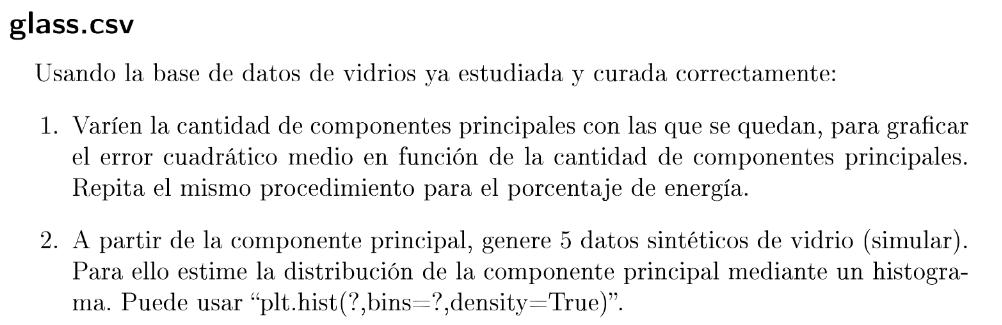

In [ ]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
from urllib import request
from sklearn import decomposition
from sklearn import datasets
from scipy.stats import norm

In [ ]:
example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows = 1)

quimicos = np.array(dataset[:,:9]) #tomo las primeras 9 columnas
resultado = np.array(dataset[:,9]) #la ultima columna me determina el resultado
largo = np.size(resultado)

In [ ]:
def curado(v,k):
  total = np.zeros(np.size(v))
  false_array = np.zeros(np.size(v))
  c = 0
  for i in np.arange(k+1):
    mask = np.where(v == i, True, False)
    if(np.array_equal(mask, false_array)):#condicion de que todo el array es false
      continue
    filtrado = mask*c
    total = total+filtrado
    c = c+1
  return total, c

In [ ]:
#curacion de datos
resultado, k = curado(resultado, 7)

In [ ]:
#normalizacion de datos
desvio_std = np.std(quimicos,axis=0) #poner el axis si o si para que calcule la media de forma adecuada.
media = np.mean(quimicos,axis=0)
quimicos_norm = (quimicos-media)/desvio_std

Defino el ECM en funcion de los componentes principales, como se puede ver a menor cantidad de componenetes principales, mayor ECM. Esto es asi debido a la perdida de informacion debido a la reduccion de dimensiones.

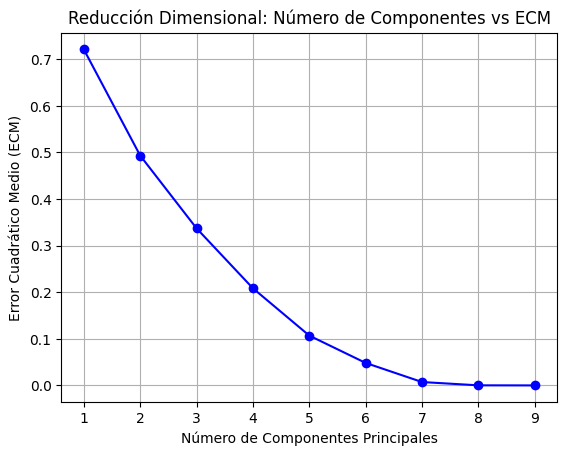

In [ ]:
#Inicializo una lista para almacenar los errores cuadráticos medios (ECM)
ecm_values = []

#Calculo el ECM para cada dimensión
n_features = quimicos_norm.shape[1]  # Obtengo número de características
for x in range(1, n_features + 1):  # Itero desde 1 hasta el número total de características
    pca = decomposition.PCA(n_components=x)
    Xh = pca.inverse_transform(pca.fit_transform(quimicos_norm))
    ecm = np.mean((quimicos_norm - Xh) ** 2)
    ecm_values.append(ecm)

#Grafico los resultados
plt.plot(range(1, n_features + 1), ecm_values, marker='o', color='blue')
plt.grid()
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Error Cuadrático Medio (ECM)')
plt.title('Reducción Dimensional: Número de Componentes vs ECM')
plt.show()

Luego se grafica la energia que determina que tanta informacion se *captura* en funcion de las dimensiones. Esto mide la eficiencia del PCA, si por ejemplo, tomamos un umbral de energia del 95%, podemos decir que trabajando con 6 dimensiones es suficiente para procesar los datos sin perder tanta informacion.

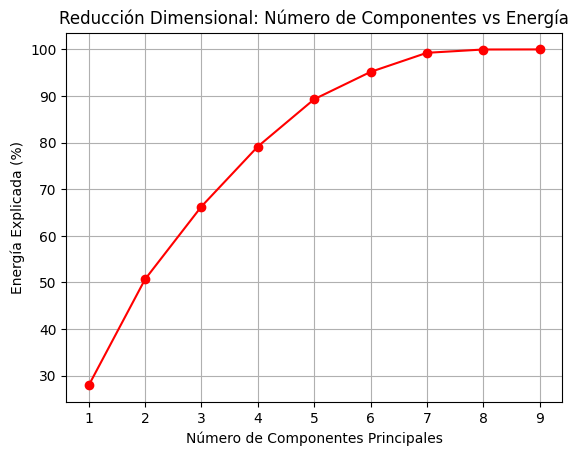

In [ ]:
energia_acumulada = []

# Calcular la energía en funcion de cada dimensión
n_features = quimicos_norm.shape[1]
for x in range(1, n_features + 1):
    pca = decomposition.PCA(n_components=x)
    pca.fit(quimicos_norm)
    energia = 100 * np.sum(pca.explained_variance_ratio_)  # Calcular energía acumulada en %
    energia_acumulada.append(energia)

# Graficar resultados
plt.plot(range(1, n_features + 1), energia_acumulada, marker='o', color='red')
plt.grid()
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Energía Explicada (%)')
plt.title('Reducción Dimensional: Número de Componentes vs Energía')
plt.show()

Con la ayuda de un histograma, determino la funcion de probabilidad que describe a los datos.

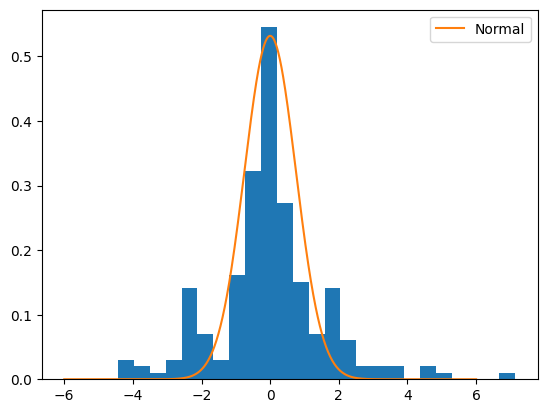

In [ ]:
x = 1
pca = decomposition.PCA(n_components=x)
pca.fit(quimicos_norm)
U = pca.transform(quimicos_norm)
plt.hist(U, 25, density=True)
y = np.linspace(-6,6, 1000)
plt.plot(y, norm.pdf(y,0, 0.75), label = 'Normal')
plt.legend()

Se generan 5 datos sinteticos en funcion de la distribucion dada y del PCA entrenado.

In [ ]:
simulated_glasses = []
sintetic_data = np.random.normal(loc=0.0, scale=0.75, size=5)
for x in np.arange(sintetic_data.size):
    simulated_glasses.append(pca.inverse_transform(sintetic_data[x].reshape(1, -1)))
print(simulated_glasses)

[array([[-0.27176671,  0.12867379, -0.05527338,  0.21370824,  0.11407331,
         0.10934146, -0.24541112,  0.12481024, -0.0926407 ]]), array([[-0.28695274,  0.13586395, -0.05836199,  0.22565002,  0.1204476 ,
         0.11545135, -0.25912443,  0.1317845 , -0.09781736]]), array([[-0.56918044,  0.26949072, -0.11576298,  0.44758443,  0.23891189,
         0.22900164, -0.51398205,  0.261399  , -0.19402404]]), array([[ 0.03197006, -0.01513691,  0.00650224, -0.02514018, -0.01341934,
        -0.0128627 ,  0.02886964, -0.01468241,  0.01089806]]), array([[-0.00132286,  0.00062634, -0.00026905,  0.00104026,  0.00055527,
         0.00053224, -0.00119457,  0.00060753, -0.00045094]])]


# Mnist PCA

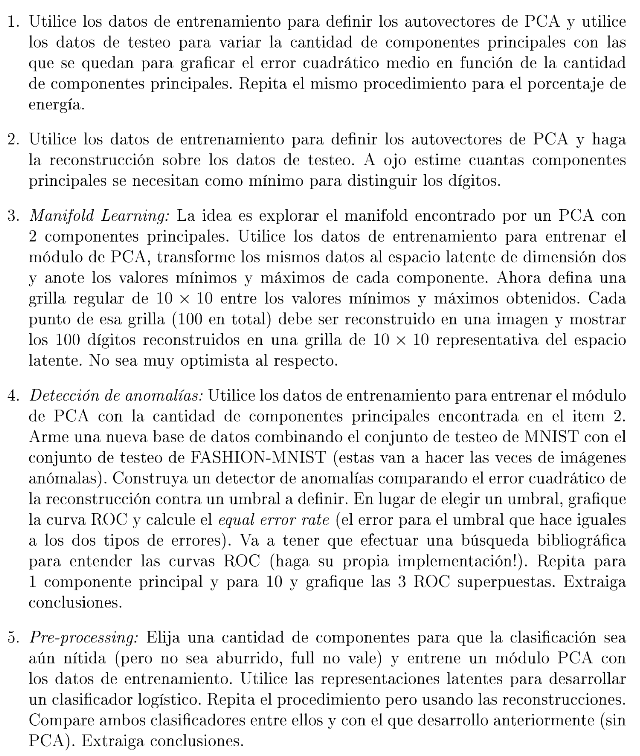

In [ ]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import decomposition, datasets, preprocessing
from sklearn.metrics import roc_curve, auc

In [ ]:
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_mnist, train_labels_mnist), (test_images_mnist,test_labels_mnist) = mnist.load_data()
(train_images_fmnist, train_labels_fmnist), (test_images_fmnist,test_labels_fmnist) = fashion_mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Proceso los datos

In [ ]:
#Aplano las imagenes
train_images_mnist = train_images_mnist.reshape(train_images_mnist.shape[0],-1)
test_images_mnist = test_images_mnist.reshape(test_images_mnist.shape[0], -1)

train_images_fmnist = train_images_fmnist.reshape(train_images_fmnist.shape[0],-1)
test_images_fmnist = test_images_fmnist.reshape(test_images_fmnist.shape[0], -1)

#Entreno PCA
pca = decomposition.PCA(n_components=train_images_mnist.shape[1])
pca.fit(train_images_mnist)
ave_mnist = pca.components_
energias_mnist = pca.explained_variance_ratio_

Mediante la energia acumulada, determino la cantidad de componentes minimos para reconstruir bien una imagen, como criterio determino que cuando la energia acumulada en funcion de los componentes principales es mayor a 95%, puedo distinguir muy bien los digitos. (*La energia puede ser aun menor, pero como criterio personal elijo ese valor*).

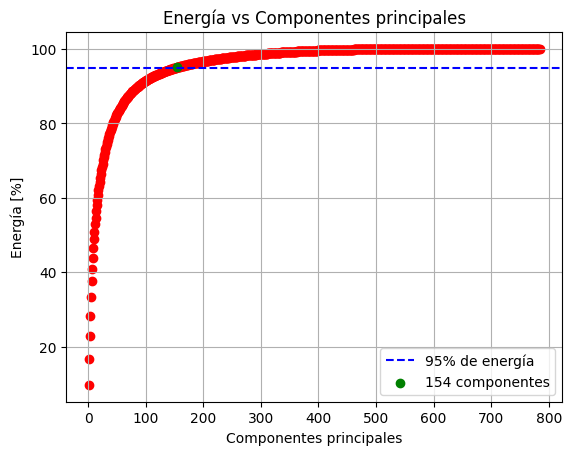

In [ ]:
energia_acumulada = np.cumsum(energias_mnist)
#Determino el número de componentes que alcanzan el 95% de energía acumulada
num_componentes_95 = np.argmax(energia_acumulada >= 0.95) + 1

for y in np.arange(1, len(energia_acumulada) + 1):
    plt.scatter(y, energia_acumulada[y-1] * 100, color='red')

#Agrego la línea horizontal al 95%
plt.axhline(y=95, color='blue', linestyle='--', label='95% de energía')
#Marco el punto donde se alcanza el 95%
plt.scatter(num_componentes_95, energia_acumulada[num_componentes_95-1] * 100, color='green', label=f'{num_componentes_95} componentes')

plt.grid()
plt.xlabel('Componentes principales')
plt.ylabel('Energía [%]')
plt.title('Energía vs Componentes principales')
plt.legend()
plt.show()

Reconstruyo parte del set de testeo en base a estos componentes principales. Y luego los grafico.

In [ ]:
dim = num_componentes_95
U = test_images_mnist @ ave_mnist[:dim,:].T
imagenes_reconstruidas = U @ ave_mnist[:dim,:]
imagenes_reconstruidas = imagenes_reconstruidas.reshape(imagenes_reconstruidas.shape[0],28,28)

In [ ]:
text_test_labels = []
text_train_labels =[]
labels = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
test_labels = np.vectorize(lambda x: labels[x])(test_labels_mnist)
train_labels = np.vectorize(lambda x: labels[x])(train_labels_mnist)

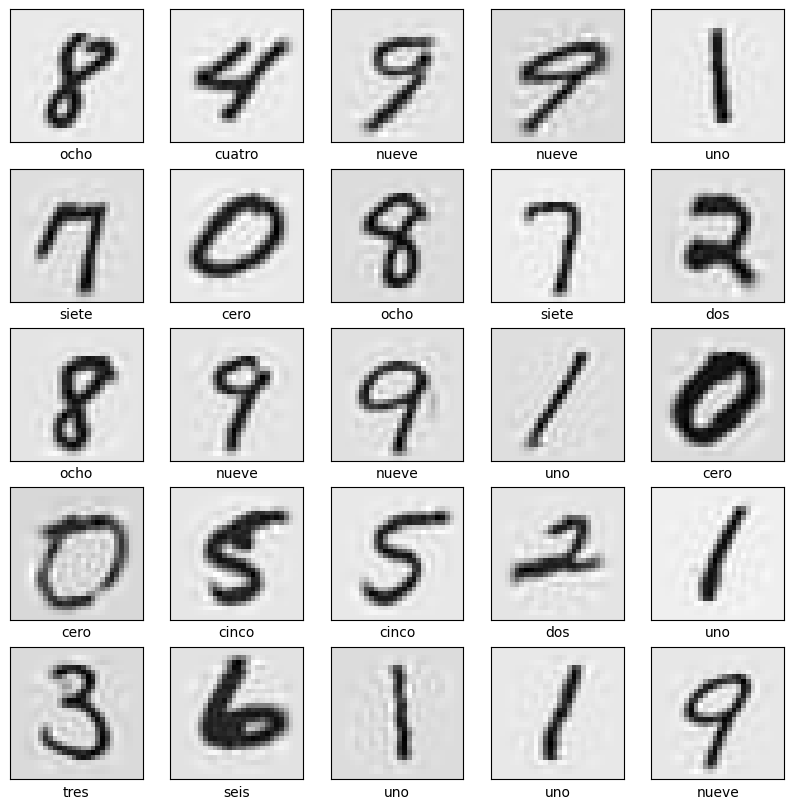

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, imagenes_reconstruidas.shape[0])
  plt.imshow(imagenes_reconstruidas[img_index], cmap="gray_r")
  plt.xlabel(test_labels[img_index])

Ahora exploro el *Manifold* para un espacio latenete de dimension 2. Se debe considerar que se esta trabajando con los valores normalizados.

In [ ]:
#manifold learning
pca2 = decomposition.PCA(n_components=2)
pca2.fit(train_images_mnist)
U2 = pca2.transform(train_images_mnist)
ave2 = pca2.components_

In [ ]:
max1 = np.max(U2[:,0])
min1 = np.min(U2[:,0])
max2 = np.max(U2[:,1])
min2 = np.min(U2[:,1])
print(max1, max2, min1, min2)

2363.324055373609 1382.3443788333755 -1081.6596987481555 -1465.939424025937


In [ ]:
x_ml = np.linspace(min1, max1, 10)
y_ml = np.linspace(min2, max2, 10)

#Creo el lienzo utilizando meshgrid
X, Y = np.meshgrid(x_ml, y_ml)
lienzo = np.stack([X.ravel(), Y.ravel()], axis=1)

In [ ]:
Xh_ml = lienzo @ ave2
Xh_ml = Xh_ml.reshape(100, 28, 28)

Represento el espacio latenete de dimesion 2. Como se puede ver, no se puede distinguir ningun digito.

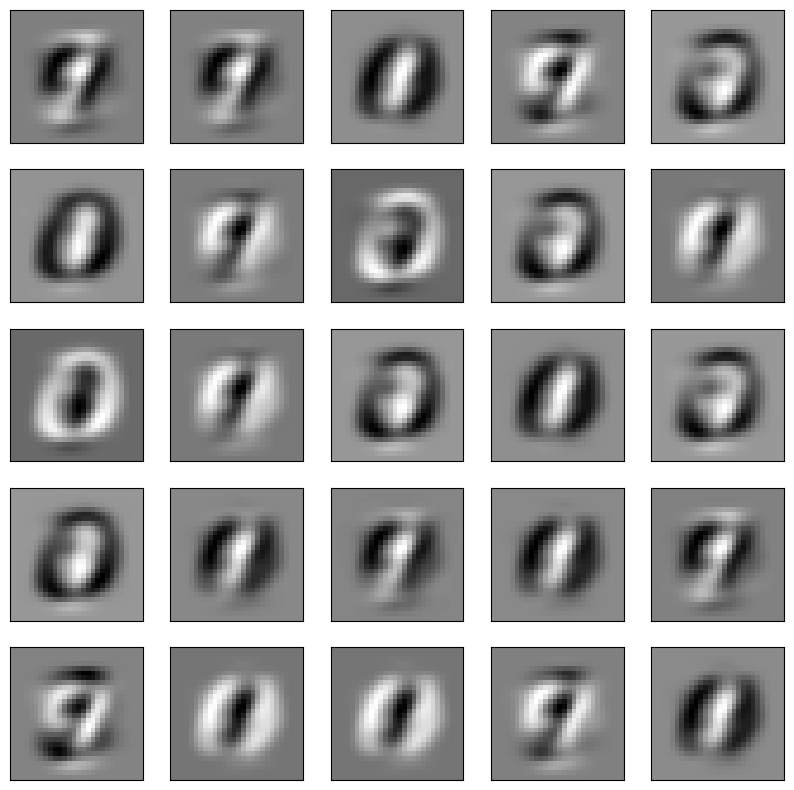

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, Xh_ml.shape[0])
  plt.imshow(Xh_ml[img_index], cmap="gray_r")

Realizo un detector de anomalias.

In [ ]:
def plot_roc_curves(labels, new_dataset, ave_mnist, component_list):
    """
    Grafica múltiples curvas ROC en una misma figura para distintas cantidades de componentes principales.

    Args:
        labels (np.ndarray): Etiquetas verdaderas (1 para positivo, 0 para negativo).
        new_dataset (np.ndarray): Dataset original.
        ave_mnist (np.ndarray): Matriz de componentes principales.
        component_list (list): Lista con el número de componentes principales a evaluar.
    """
    plt.figure(figsize=(8, 6))

    for num_components in component_list:
        # Reconstrucción del dataset con los componentes principales seleccionados
        U_nd = new_dataset @ ave_mnist[:num_components, :].T
        Xh_nd = U_nd @ ave_mnist[:num_components, :]

        # Calculo del vector de errores cuadráticos
        ce_vector = np.sum((new_dataset - Xh_nd) ** 2, axis=1)

        # Calculo de la curva ROC
        fpr, tpr, _ = roc_curve(labels, ce_vector)
        roc_auc = auc(fpr, tpr)

        # Grafico de la curva ROC
        plt.plot(fpr, tpr, label=f'{num_components} componentes (AUC = {roc_auc:.2f})')

    # Línea de referencia para una clasificación aleatoria
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')
    plt.title("Curvas ROC para diferentes componentes principales")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid()
    plt.legend()
    plt.show()

Creo un nuevo dataset y agrego unos labels que determinan si un dataset pertenece a digitos o prendas de ropa.

Se puede ver de las curvas ROCs que para la cantidad de componentes principales que contienen una energia acumulada del 95% (154 componentes), se pueden detectar anomalias mejor que para 1 componente o 10 componentes. Dado que a mayor AUC, mejor detector de anomalia es.

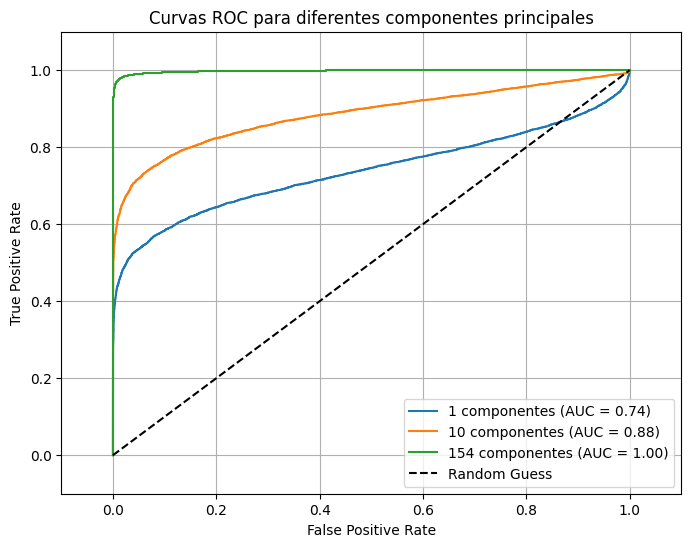

In [ ]:
new_dataset = np.vstack((test_images_mnist, test_images_fmnist))
labels = np.concatenate([np.zeros(test_images_mnist.shape[0]), np.ones(test_images_fmnist.shape[0])])

component_list = [1, 10, num_componentes_95]  # Distintas cantidades de componentes principales
plot_roc_curves(labels, new_dataset, ave_mnist, component_list)

Etapa de *pre-procesing*.

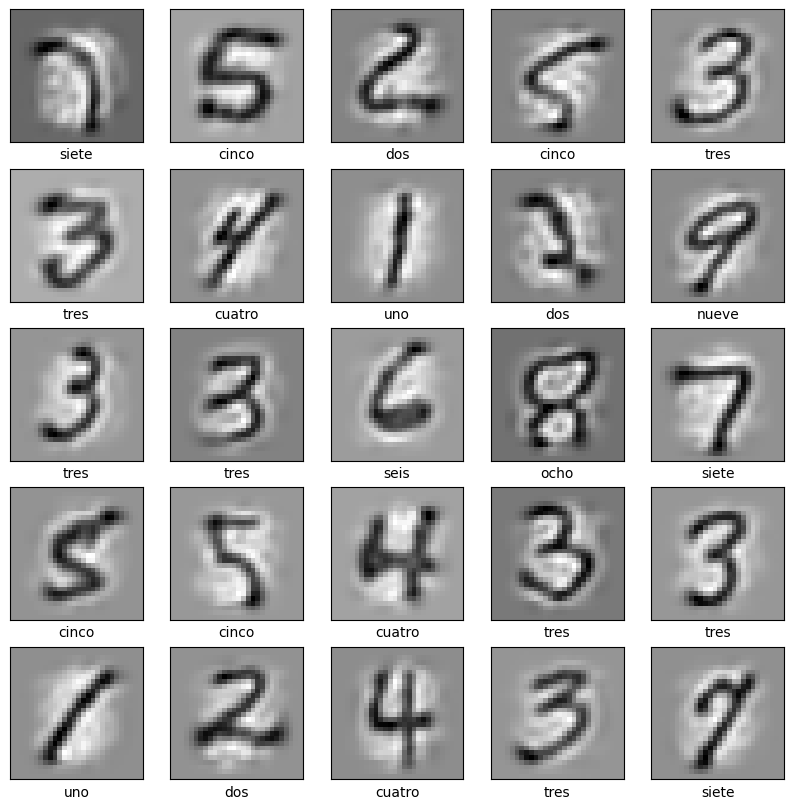

In [ ]:
#Pre processing: utilizo el pca de 80 componentes
pca3 = decomposition.PCA(n_components=80)
pca3.fit(train_images_mnist)
U3 = pca3.transform(train_images_mnist)
ave3 = pca3.components_

imagenes_reconstruidas2 = U3 @ ave3
imagenes_reconstruidas2 = imagenes_reconstruidas2.reshape(imagenes_reconstruidas2.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, imagenes_reconstruidas2.shape[0])
  plt.imshow(imagenes_reconstruidas2[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

Entreno un modelo de claisificacion con el set de entrenamiento reconstruido.

In [ ]:
imagenes_reconstruidas2 = imagenes_reconstruidas2.reshape(imagenes_reconstruidas2.shape[0], -1)

In [ ]:
# Crear el modelo
model = tf.keras.Sequential()

# Capa de entrada
model.add(tf.keras.layers.Dense(10, input_dim=imagenes_reconstruidas2.shape[1]))

# Capas adicionales
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Capa de salida
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entrenamiento del modelo
hist = model.fit(x=imagenes_reconstruidas2, y=train_labels_mnist, batch_size=np.size(train_labels_mnist), epochs=5000, callbacks=[es])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,460 (52.58 KB)

 Trainable params: 13,460 (52.58 KB)

 Non-trainable params: 0 (0.00 B)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9413 - loss: 0.2016
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9413 - loss: 0.2016
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.9413 - loss: 0.2016
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.9413 - loss: 0.2015
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9413 - loss: 0.2015
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step - accuracy: 0.9413 - loss: 0.2015
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.9413 - loss: 0.2015
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.9413 - loss: 0.2014
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.9414 - loss: 0.2014
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9414 - loss: 0.2014
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy

In [ ]:
def graficar_matriz_confusion(model, entrada, salida, labels):
  valores_estimados = model.predict(entrada)
  resultados_estimados = np.argmax(valores_estimados, axis=1)

  def show_results(y_true,y_pred):

    # Plot confusion matrix
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    # Replace 'labels' with a list of unique class labels
    display_labels = ["Cero", "Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]
    dsp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=display_labels, ax=ax)
    print(classification_report(y_true, y_pred))

  show_results(salida, resultados_estimados)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       980
           1       0.93      0.23      0.37      1135
           2       0.71      0.90      0.79      1032
           3       0.77      0.83      0.80      1010
           4       0.81      0.82      0.81       982
           5       0.89      0.67      0.76       892
           6       0.93      0.86      0.90       958
           7       0.96      0.75      0.84      1028
           8       0.43      0.96      0.59       974
           9       0.83      0.69      0.75      1009

    accuracy                           0.75     10000
   macro avg       0.82      0.76      0.75     10000
weighted avg       0.82      0.75      0.75     10000



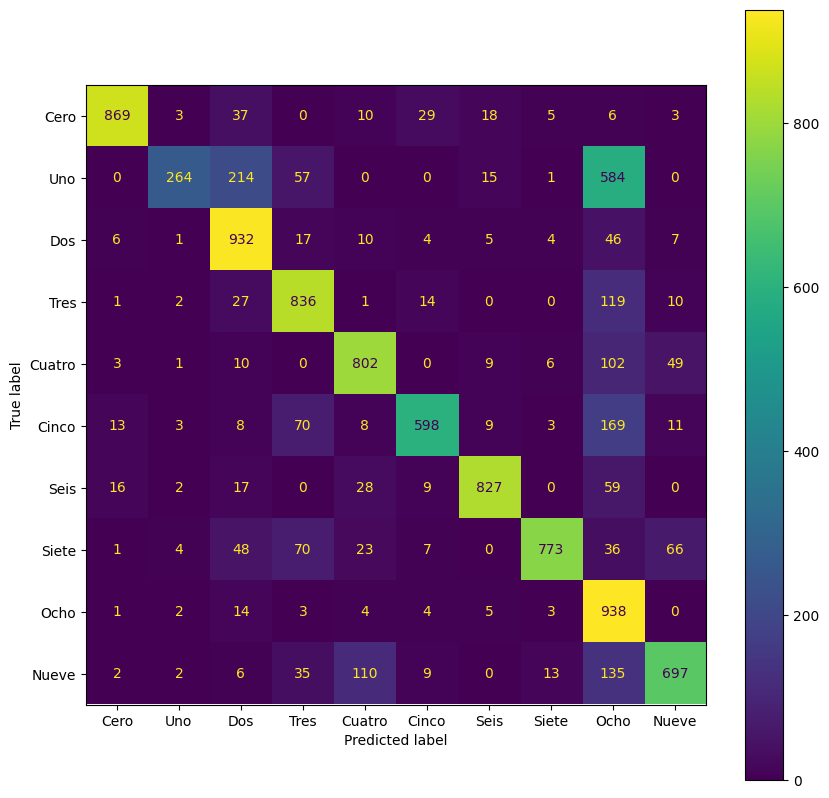

In [ ]:
graficar_matriz_confusion(model, test_images_mnist, test_labels_mnist, labels)

Realizo otro modelo pero entrenando con el espacio latente.

In [ ]:
# Crear el modelo
model2 = tf.keras.Sequential()

# Capa de entrada
model2.add(tf.keras.layers.Dense(10, input_dim=U3.shape[1]))

# Capas adicionales
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))

# Capa de salida
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entrenamiento del modelo
hist = model2.fit(x=U3, y=train_labels_mnist, batch_size=np.size(train_labels_mnist), epochs=5000, callbacks=[es])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,420 (25.08 KB)

 Trainable params: 6,420 (25.08 KB)

 Non-trainable params: 0 (0.00 B)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9075 - loss: 0.3165
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9075 - loss: 0.3165
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9075 - loss: 0.3164
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9076 - loss: 0.3164
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9075 - loss: 0.3163
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9076 - loss: 0.3163
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9076 - loss: 0.3162
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9076 - loss: 0.3162
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9076 - loss: 0.3161
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9077 - loss: 0.3161
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9076

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.98      0.56      0.71      1135
           2       0.88      0.87      0.87      1032
           3       0.75      0.89      0.81      1010
           4       0.91      0.72      0.81       982
           5       0.92      0.78      0.84       892
           6       0.93      0.89      0.91       958
           7       0.97      0.69      0.81      1028
           8       0.48      0.96      0.64       974
           9       0.76      0.74      0.75      1009

    accuracy                           0.80     10000
   macro avg       0.85      0.81      0.81     10000
weighted avg       0.85      0.80      0.81     10000



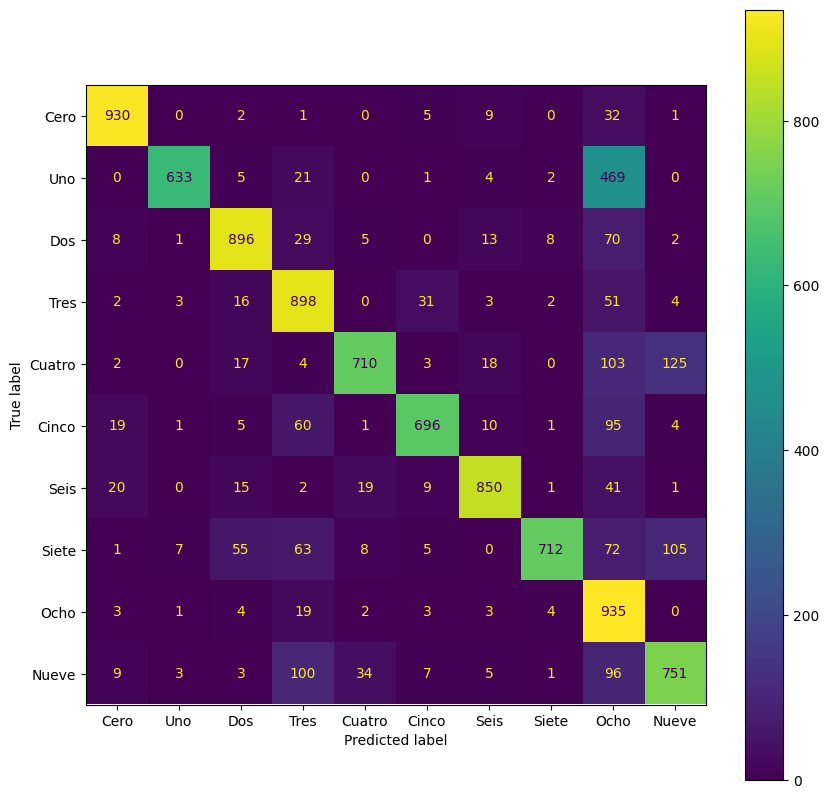

In [ ]:
U3_test_images = test_images_mnist @ ave3.T
graficar_matriz_confusion(model2, U3_test_images, test_labels_mnist, labels)

Viendo ambas matrices de confusion, se puede ver que en general hay un mejor comportamiento entrenando modelos con el espacio latenente que utilizando imagenes reconstruidas. Se puede ver que el *accuracy* es 5% mejor entrenando con el espacio latente que entrenando con imagenes reconstruidas.